In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout, Input,Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras import optimizers, initializers, regularizers, metrics
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Car Classification'

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    seed=123,
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

Found 9900 files belonging to 33 classes.
Using 7920 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    seed=123,
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 9900 files belonging to 33 classes.
Using 1980 files for validation.


In [ ]:
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = (train_ds.map(convert_to_float).cache().prefetch(buffer_size=AUTOTUNE))
val_ds = (val_ds.map(convert_to_float).cache().prefetch(buffer_size=AUTOTUNE))

DenseNet Freezing 108

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))

29084464/29084464 [==============================] - 1s 0us/step


In [ ]:
num = 1
for layer in base_model.layers:
  if num >= 108:
    layer.trainable = True
  else:
    layer.trainable = False
  num += 1

In [ ]:
model = Sequential()

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3)))

model.add(base_model)

model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(padding='same'))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(33 , activation = 'softmax'))

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, 
optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 16)          147472    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 16)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 4, 4, 16)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 32)          4640      
                                                        

In [ ]:
hist = model.fit(train_ds,batch_size=64,epochs=20,validation_data=val_ds)

Epoch 1/20
124/124 [==============================] - 1528s 11s/step - loss: 3.4565 - accuracy: 0.0434 - val_loss: 3.4809 - val_accuracy: 0.0374
Epoch 2/20
124/124 [==============================] - 56s 452ms/step - loss: 3.0988 - accuracy: 0.1218 - val_loss: 3.4025 - val_accuracy: 0.1495
Epoch 3/20
124/124 [==============================] - 56s 451ms/step - loss: 2.7078 - accuracy: 0.2218 - val_loss: 2.9052 - val_accuracy: 0.2444
Epoch 4/20
124/124 [==============================] - 56s 451ms/step - loss: 2.3624 - accuracy: 0.3263 - val_loss: 1.7559 - val_accuracy: 0.4854
Epoch 5/20
124/124 [==============================] - 55s 448ms/step - loss: 2.0904 - accuracy: 0.4188 - val_loss: 1.5321 - val_accuracy: 0.5889
Epoch 6/20
124/124 [==============================] - 56s 449ms/step - loss: 1.8382 - accuracy: 0.4920 - val_loss: 1.4255 - val_accuracy: 0.6237
Epoch 7/20
124/124 [==============================] - 56s 451ms/step - loss: 1.5483 - accuracy: 0.5707 - val_loss: 1.3545 - val_ac

In [ ]:
model.evaluate(train_ds), model.evaluate(val_ds)

31/31 [==============================] - 6s 185ms/step - loss: 0.6223 - accuracy: 0.8596


([0.6725229024887085, 0.8310605883598328],
 [0.6223246455192566, 0.8595959544181824])

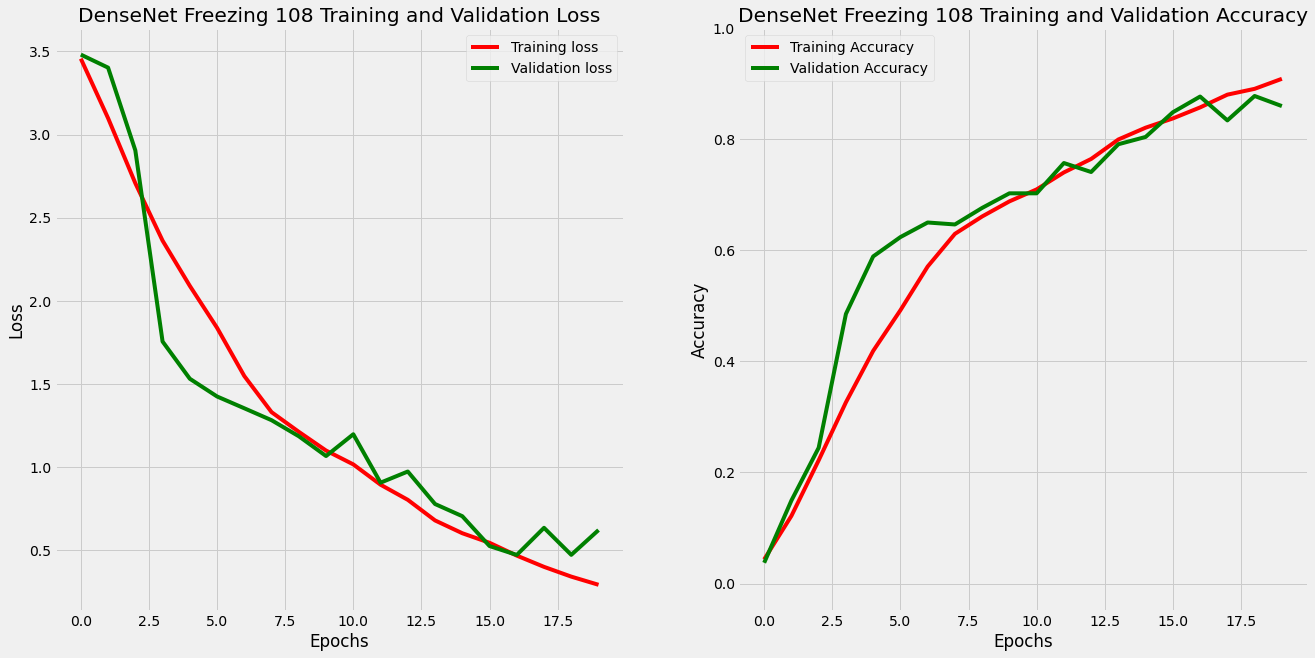

In [ ]:
plt.style.use('fivethirtyeight')
fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].plot(hist.history["loss"], 'r', label='Training loss')
axes[0].plot(hist.history["val_loss"],'g',label='Validation loss' )
axes[0].set_title('DenseNet Freezing 108 Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
plt.ylim(-0.05,1.0)
axes[1].plot (hist.history["accuracy"],'r',label= 'Training Accuracy')
axes[1].plot (hist.history["val_accuracy"],'g',label= 'Validation Accuracy')
axes[1].set_title('DenseNet Freezing 108 Training and Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/DenseNet Freezing 108_graph.jpg")

DenseNet Freezing 

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [ ]:
num = 1
for layer in base_model.layers:
  if num >= 73:
    layer.trainable = True
  else:
    layer.trainable = False
  num += 1

In [ ]:
model = Sequential()

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3)))

model.add(base_model)

model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(padding='same'))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(33 , activation = 'softmax'))

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, 
optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
hist = model.fit(train_ds,batch_size=64,epochs=20,validation_data=val_ds)

Epoch 1/20
124/124 [==============================] - 73s 510ms/step - loss: 3.3936 - accuracy: 0.0534 - val_loss: 3.5162 - val_accuracy: 0.0000e+00
Epoch 2/20
124/124 [==============================] - 61s 495ms/step - loss: 2.8996 - accuracy: 0.1646 - val_loss: 3.5002 - val_accuracy: 0.0313
Epoch 3/20
124/124 [==============================] - 62s 497ms/step - loss: 2.2808 - accuracy: 0.3313 - val_loss: 3.9674 - val_accuracy: 0.0434
Epoch 4/20
124/124 [==============================] - 62s 496ms/step - loss: 1.7450 - accuracy: 0.4967 - val_loss: 2.2645 - val_accuracy: 0.4318
Epoch 5/20
124/124 [==============================] - 62s 500ms/step - loss: 1.4355 - accuracy: 0.6014 - val_loss: 1.5753 - val_accuracy: 0.5788
Epoch 6/20
124/124 [==============================] - 62s 498ms/step - loss: 1.2536 - accuracy: 0.6513 - val_loss: 1.4987 - val_accuracy: 0.6131
Epoch 7/20
124/124 [==============================] - 61s 496ms/step - loss: 1.1341 - accuracy: 0.6787 - val_loss: 1.4566 - va

In [ ]:
model.evaluate(train_ds), model.evaluate(val_ds)

31/31 [==============================] - 6s 190ms/step - loss: 0.4561 - accuracy: 0.8955


([0.4052066504955292, 0.8967171907424927],
 [0.45611050724983215, 0.8954545259475708])

DenseNet Freezing 140

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [ ]:
num = 1
for layer in base_model.layers:
  if num >= 140:
    layer.trainable = True
  else:
    layer.trainable = False
  num += 1

In [ ]:
model = Sequential()

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3)))

model.add(base_model)

model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(padding='same'))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(33 , activation = 'softmax'))

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, 
optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
hist = model.fit(train_ds,batch_size=64,epochs=20,validation_data=val_ds)

Epoch 1/20
124/124 [==============================] - 67s 447ms/step - loss: 3.4887 - accuracy: 0.0355 - val_loss: 3.4853 - val_accuracy: 0.0096
Epoch 2/20
124/124 [==============================] - 48s 386ms/step - loss: 3.3033 - accuracy: 0.0816 - val_loss: 3.3933 - val_accuracy: 0.0449
Epoch 3/20
124/124 [==============================] - 48s 387ms/step - loss: 2.9475 - accuracy: 0.1697 - val_loss: 3.1041 - val_accuracy: 0.1308
Epoch 4/20
124/124 [==============================] - 48s 386ms/step - loss: 2.4953 - accuracy: 0.2780 - val_loss: 2.1669 - val_accuracy: 0.3596
Epoch 5/20
124/124 [==============================] - 48s 389ms/step - loss: 2.1261 - accuracy: 0.3891 - val_loss: 1.6095 - val_accuracy: 0.5167
Epoch 6/20
124/124 [==============================] - 48s 389ms/step - loss: 1.8493 - accuracy: 0.4775 - val_loss: 1.4782 - val_accuracy: 0.5879
Epoch 7/20
124/124 [==============================] - 48s 389ms/step - loss: 1.6686 - accuracy: 0.5321 - val_loss: 1.4291 - val_ac

In [ ]:
model.evaluate(train_ds), model.evaluate(val_ds)

31/31 [==============================] - 6s 186ms/step - loss: 0.8705 - accuracy: 0.7697


([0.5871275067329407, 0.8271464705467224],
 [0.8705123662948608, 0.7696969509124756])

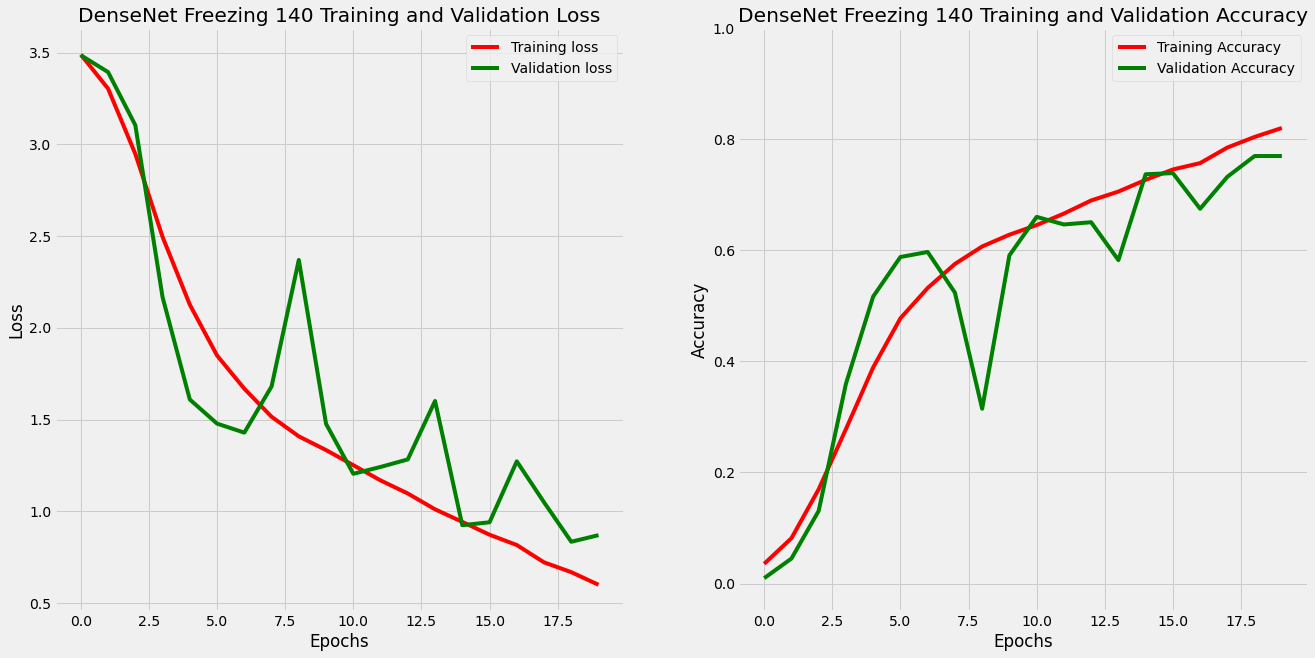

In [ ]:
plt.style.use('fivethirtyeight')
fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].plot(hist.history["loss"], 'r', label='Training loss')
axes[0].plot(hist.history["val_loss"],'g',label='Validation loss' )
axes[0].set_title('DenseNet Freezing 140 Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
plt.ylim(-0.05,1.0)
axes[1].plot (hist.history["accuracy"],'r',label= 'Training Accuracy')
axes[1].plot (hist.history["val_accuracy"],'g',label= 'Validation Accuracy')
axes[1].set_title('DenseNet Freezing 140 Training and Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/DenseNet Freezing 140_graph.jpg")

DenseNet Freezing 63

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [ ]:
num = 1
for layer in base_model.layers:
  if num >= 63:
    layer.trainable = True
  else:
    layer.trainable = False
  num += 1

In [ ]:
model = Sequential()

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3)))

model.add(base_model)

model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(padding='same'))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(33 , activation = 'softmax'))

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, 
optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
hist = model.fit(train_ds,batch_size=64,epochs=20,validation_data=val_ds)

Epoch 1/20
124/124 [==============================] - 81s 559ms/step - loss: 3.4274 - accuracy: 0.0563 - val_loss: 3.4493 - val_accuracy: 0.0409
Epoch 2/20
124/124 [==============================] - 64s 514ms/step - loss: 2.7932 - accuracy: 0.1972 - val_loss: 3.5405 - val_accuracy: 0.0328
Epoch 3/20
124/124 [==============================] - 63s 509ms/step - loss: 2.1333 - accuracy: 0.3797 - val_loss: 3.1034 - val_accuracy: 0.1783
Epoch 4/20
124/124 [==============================] - 63s 510ms/step - loss: 1.6481 - accuracy: 0.5298 - val_loss: 2.6748 - val_accuracy: 0.2126
Epoch 5/20
124/124 [==============================] - 63s 511ms/step - loss: 1.3394 - accuracy: 0.6210 - val_loss: 2.5184 - val_accuracy: 0.3480
Epoch 6/20
124/124 [==============================] - 63s 510ms/step - loss: 1.1486 - accuracy: 0.6674 - val_loss: 1.2752 - val_accuracy: 0.6510
Epoch 7/20
124/124 [==============================] - 64s 513ms/step - loss: 0.9901 - accuracy: 0.7117 - val_loss: 1.0820 - val_ac

In [ ]:
model.evaluate(train_ds), model.evaluate(val_ds)

31/31 [==============================] - 6s 187ms/step - loss: 0.2805 - accuracy: 0.9298


([0.28344428539276123, 0.9270201921463013],
 [0.28053954243659973, 0.9297980070114136])

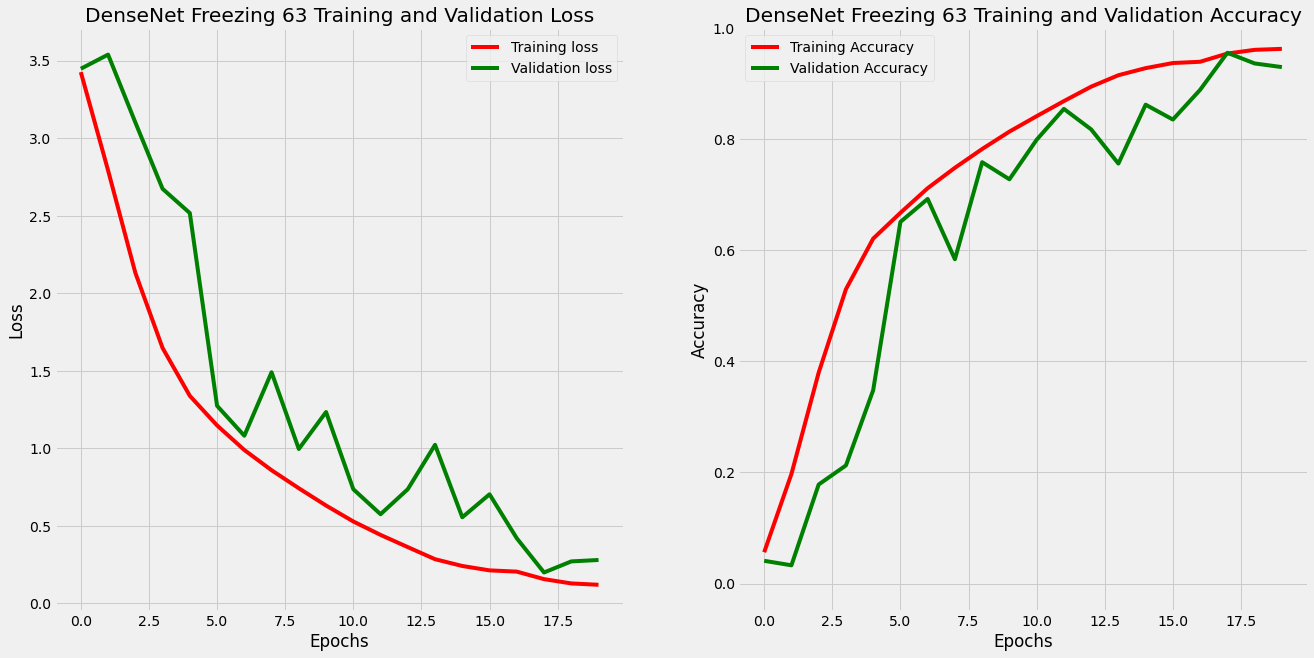

In [ ]:
plt.style.use('fivethirtyeight')
fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].plot(hist.history["loss"], 'r', label='Training loss')
axes[0].plot(hist.history["val_loss"],'g',label='Validation loss' )
axes[0].set_title('DenseNet Freezing 63 Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
plt.ylim(-0.05,1.0)
axes[1].plot (hist.history["accuracy"],'r',label= 'Training Accuracy')
axes[1].plot (hist.history["val_accuracy"],'g',label= 'Validation Accuracy')
axes[1].set_title('DenseNet Freezing 63 Training and Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/DenseNet Freezing 63_graph.jpg")